In [1]:
from datetime import datetime
from datetime import timezone
import polars as pl
import os
from plot_data import plot_sensor_measurement, plot_sensor_calibration, plot_wind_rose


start_date = datetime(2023, 10, 3, 0, 0, 0).replace(tzinfo=timezone.utc)
end_date = datetime(2023, 10, 4, 23, 59, 59).replace(tzinfo=timezone.utc)

sensor_id = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20]
quickflow_directory = "/Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/quickflow/acropolis/"


In [2]:
do_pivot = False

if do_pivot:
    df_parq = pl.scan_parquet(os.path.join(quickflow_directory, "measurements.parquet")).collect().pivot(
                    values="value",
                    index=[
                        "system_name",
                        "revision",
                        "creation_timestamp",
                        "receipt_timestamp",
                    ],
                    columns="attribute",
                    aggregate_function="first",
                )

    df_parq.write_parquet(
                os.path.join(quickflow_directory, "pivot_measurements.parquet"),
                statistics=True,
            )

In [3]:
df = pl.scan_parquet(os.path.join(quickflow_directory, "pivot_measurements.parquet"))

df = df.sort("creation_timestamp").filter(pl.col("creation_timestamp").is_between(start_date, end_date))

df.tail(5).collect()

system_name,revision,creation_timestamp,receipt_timestamp,gmp343_temperature,sht45_temperature,sht45_humidity,gmp343_compensated,gmp343_raw,bme280_humidity,bme280_temperature,gmp343_filtered,bme280_pressure,enclosure_bme280_temperature,raspi_memory_usage,enclosure_bme280_pressure,raspi_cpu_temperature,raspi_cpu_usage,raspi_disk_usage,enclosure_bme280_humidity,wxt532_direction_avg,wxt532_speed_avg,wxt532_direction_min,wxt532_speed_max,wxt532_last_update_time,wxt532_speed_min,wxt532_direction_max
str,i32,"datetime[ns, UTC]","datetime[ns, UTC]",f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""tum-esm-midcos…",7,2023-10-04 23:59:56.110 UTC,2023-10-04 23:59:58.184207 UTC,17.9,16.27,52.09,451.0,426.6,51.18,16.09,453.1,947.7,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""tum-esm-midcos…",9,2023-10-04 23:59:56.380 UTC,2023-10-04 23:59:58.266192 UTC,17.0,15.47,55.46,444.3,415.4,54.63,15.32,444.9,941.09,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""tum-esm-midcos…",15,2023-10-04 23:59:56.450 UTC,2023-10-04 23:59:59.573176 UTC,16.4,15.01,57.02,457.7,435.8,55.0,14.85,453.9,949.57,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""tum-esm-midcos…",27,2023-10-04 23:59:57.230 UTC,2023-10-04 23:59:57.839282 UTC,16.7,14.94,56.28,440.0,420.3,54.83,14.99,442.8,946.62,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""tum-esm-midcos…",12,2023-10-04 23:59:58.500 UTC,2023-10-05 00:00:00.900811 UTC,16.6,15.32,55.41,439.2,419.3,53.32,15.04,442.3,946.92,null,null,null,null,null,null,null,null,null,null,null,null,null,null


<Axes: xlabel='creation_timestamp', ylabel='gmp343_filtered'>

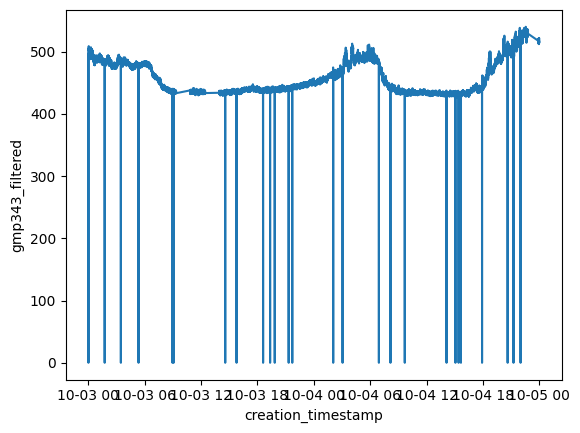

In [4]:
# why is the data from system 1 not plotted?
import seaborn as sns

sns.lineplot(data=df.collect().filter(pl.col("system_name") == f"tum-esm-midcost-raspi-1"), x="creation_timestamp", y="gmp343_filtered")

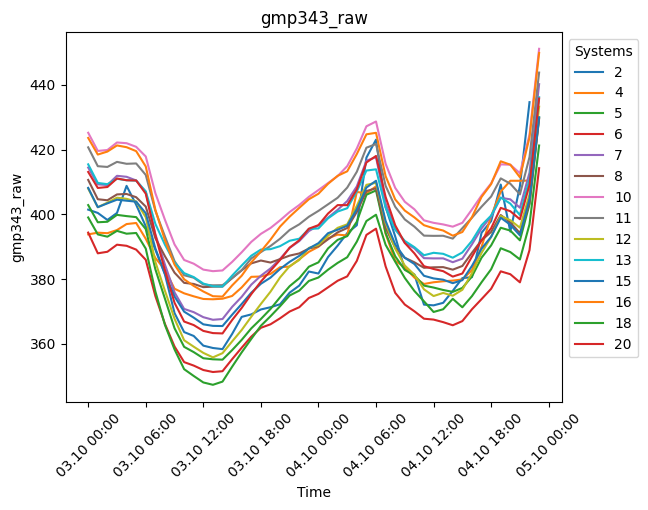

In [5]:
plot_sensor_measurement(df,col_name="gmp343_raw",sensor_id=sensor_id,filter='1h')

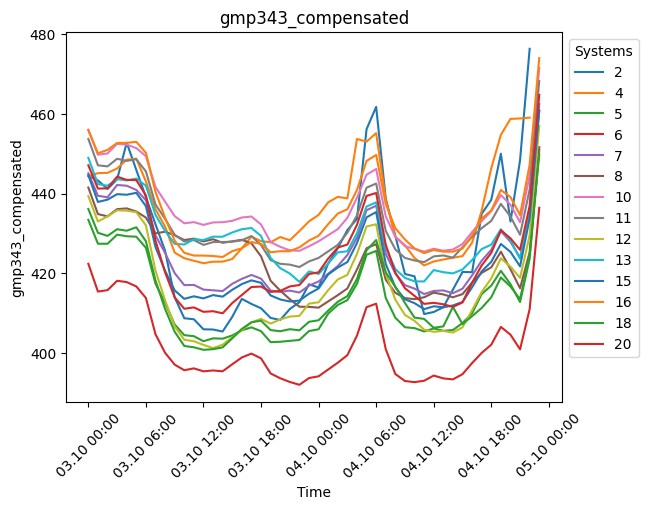

In [6]:
plot_sensor_measurement(df,col_name="gmp343_compensated",sensor_id=sensor_id,filter='1h')

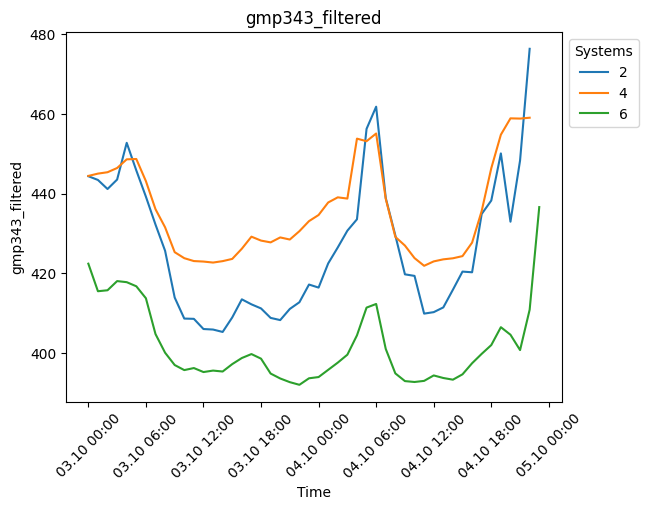

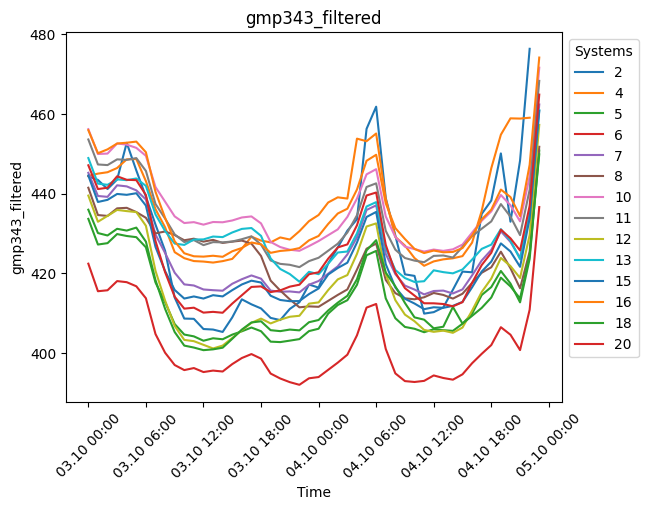

In [7]:
plot_sensor_measurement(df,col_name="gmp343_filtered",sensor_id=[1,2,3,4,6],filter='1h')
plot_sensor_measurement(df,col_name="gmp343_filtered",sensor_id=sensor_id,filter='1h')

In [8]:
# Maisach
plot_wind_rose(df,1, 'Maisach')
# Rechts-der-Isar
plot_wind_rose(df,2, 'Rechts-der-Isar')
# Finsing
plot_wind_rose(df,3, 'Finsing')
# Großhadern
plot_wind_rose(df,4, 'Großhadern')
# plot wind at 3m pole inlet
plot_wind_rose(df,7, 'TUM')

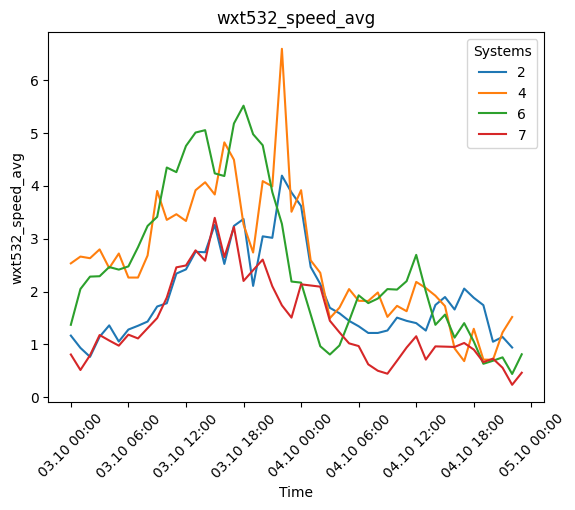

In [9]:
plot_sensor_measurement(df,col_name="wxt532_speed_avg",sensor_id=sensor_id,filter='1h')

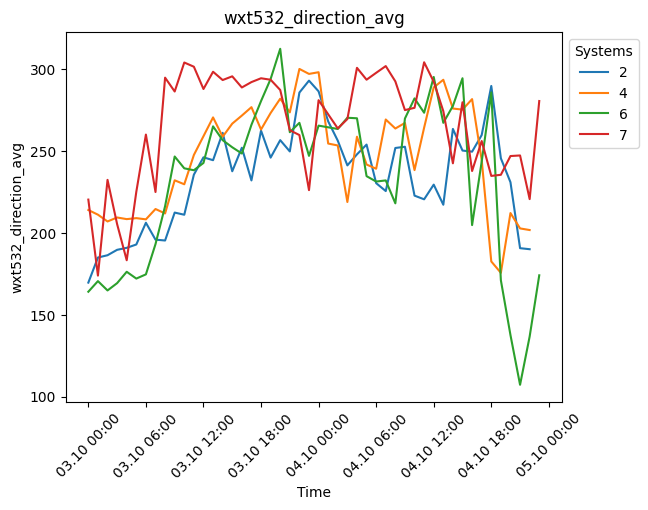

In [10]:
plot_sensor_measurement(df,col_name="wxt532_direction_avg",sensor_id=sensor_id,filter='1h')

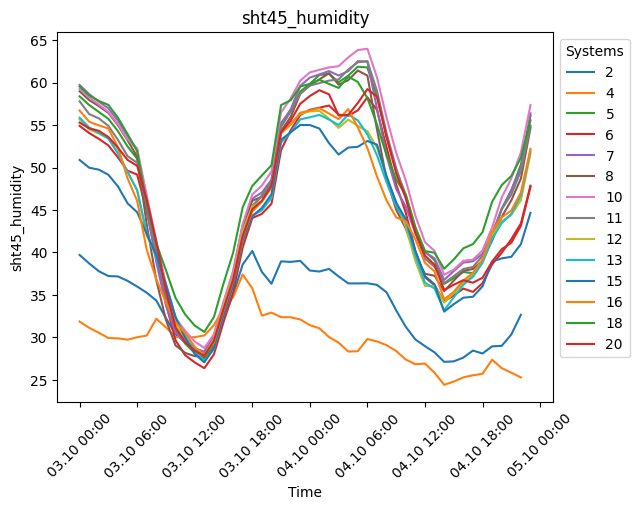

In [11]:
# Plot auxilliary data
plot_sensor_measurement(df,col_name="sht45_humidity",sensor_id=sensor_id,filter='1h')

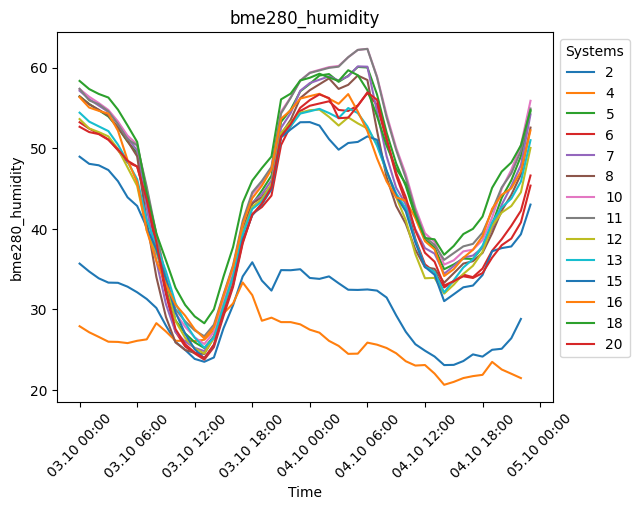

In [12]:
plot_sensor_measurement(df,col_name="bme280_humidity",sensor_id=sensor_id,filter='1h')

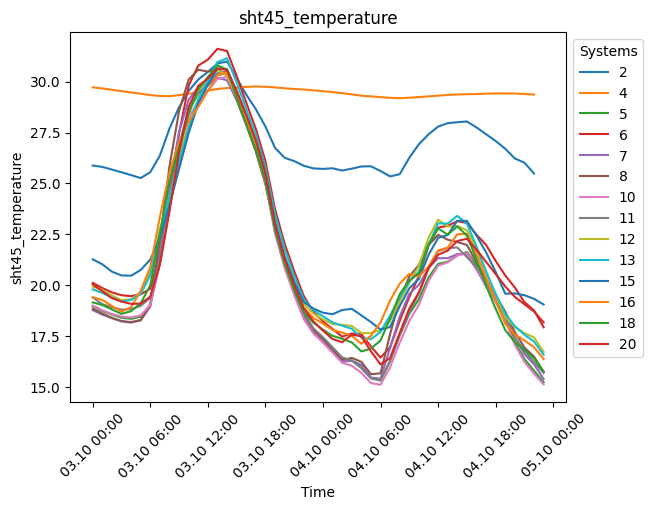

In [13]:
plot_sensor_measurement(df,col_name="sht45_temperature",sensor_id=sensor_id,filter='1h')

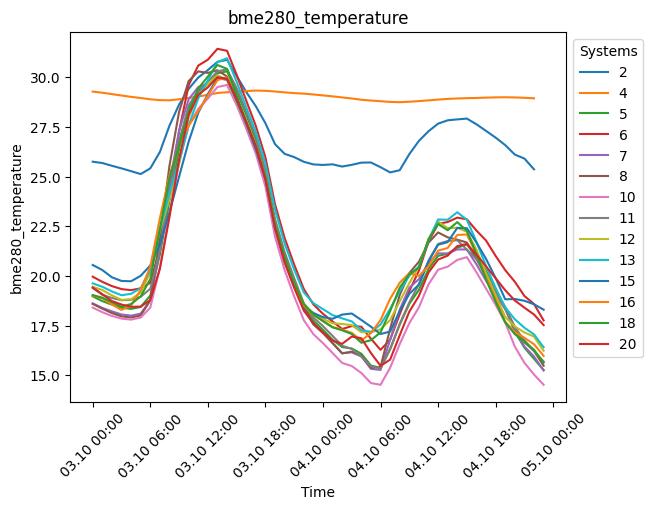

In [14]:
plot_sensor_measurement(df,col_name="bme280_temperature",sensor_id=sensor_id,filter='1h')

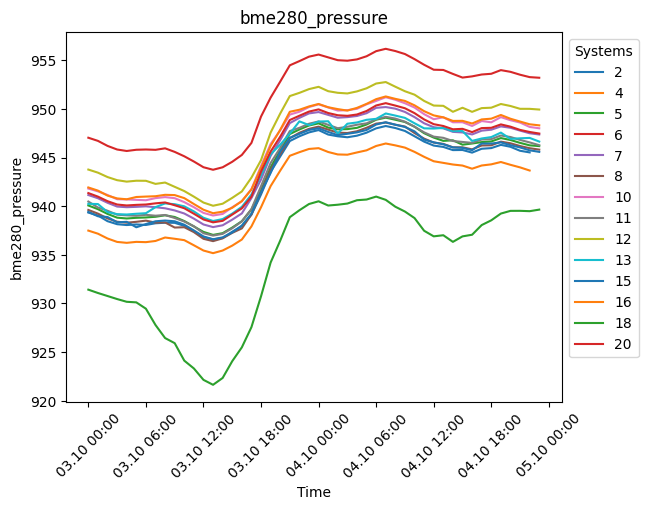

In [15]:
plot_sensor_measurement(df,col_name="bme280_pressure",sensor_id=sensor_id,filter='1h')

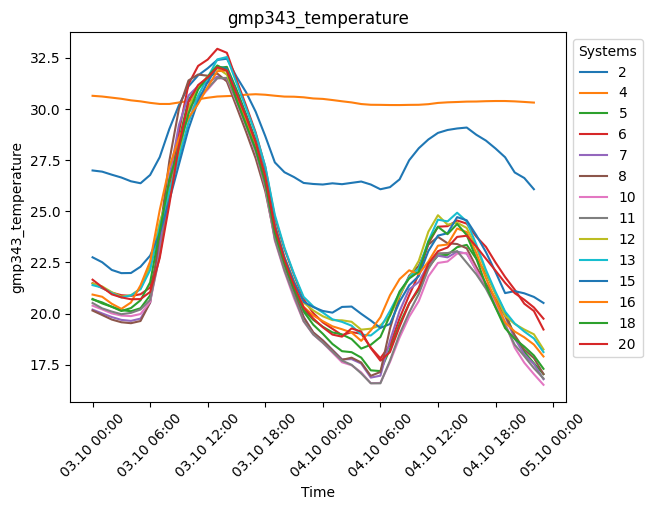

In [16]:
plot_sensor_measurement(df,col_name="gmp343_temperature",sensor_id=sensor_id,filter='1h')

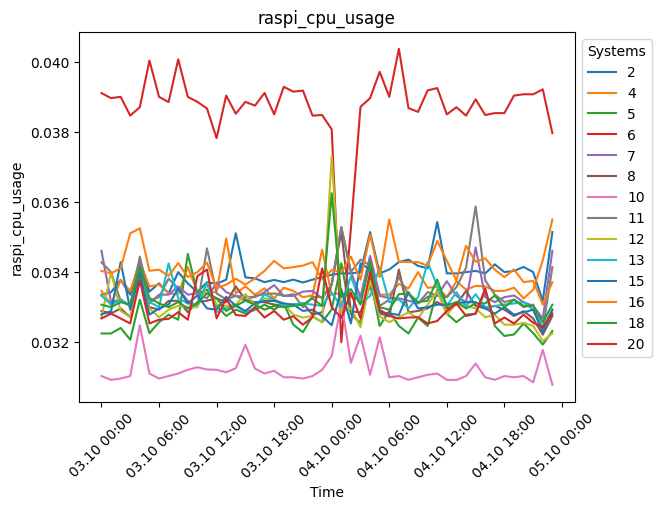

In [17]:
plot_sensor_measurement(df,col_name="raspi_cpu_usage",sensor_id=sensor_id,filter='1h')

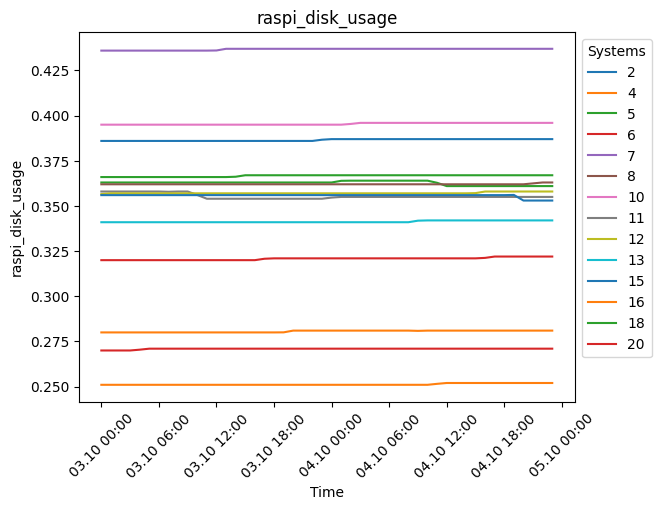

In [18]:
plot_sensor_measurement(df,col_name="raspi_disk_usage",sensor_id=sensor_id,filter='1h')

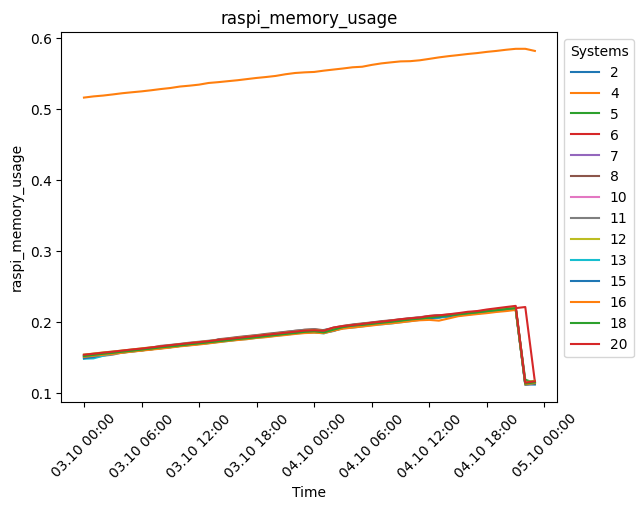

In [19]:
plot_sensor_measurement(df,col_name="raspi_memory_usage",sensor_id=sensor_id,filter='1h')

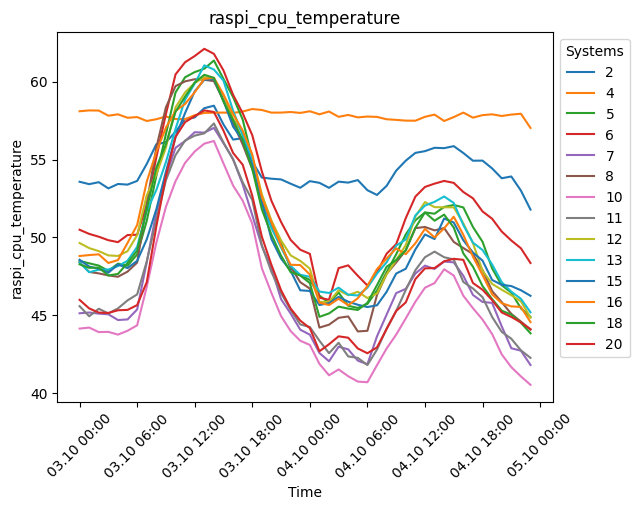

In [20]:
plot_sensor_measurement(df,col_name="raspi_cpu_temperature",sensor_id=sensor_id,filter='1h')

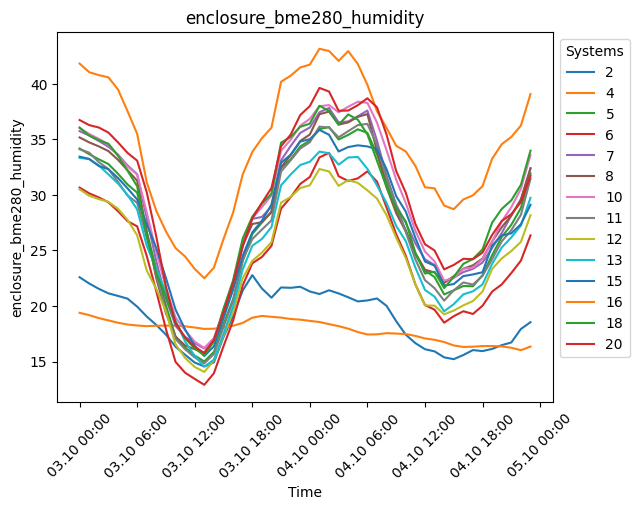

In [21]:
plot_sensor_measurement(df,col_name="enclosure_bme280_humidity",sensor_id=sensor_id,filter='1h')

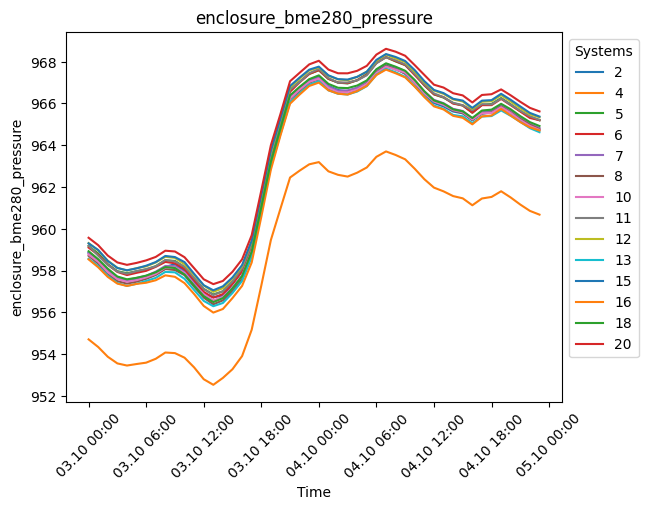

In [22]:
plot_sensor_measurement(df,col_name="enclosure_bme280_pressure",sensor_id=sensor_id,filter='1h')

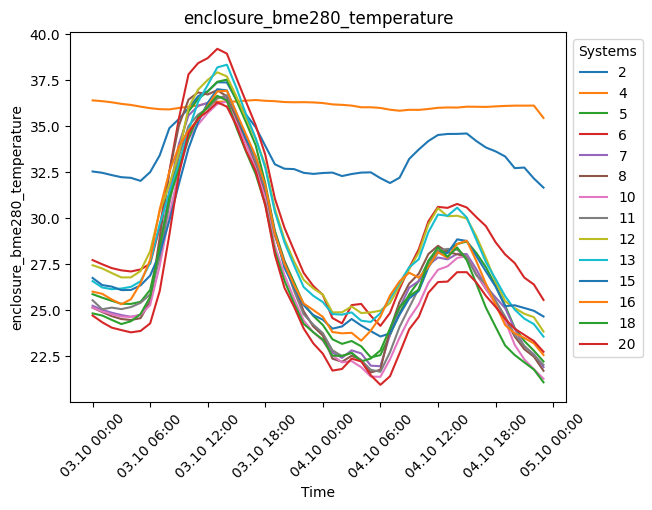

In [23]:
plot_sensor_measurement(df,col_name="enclosure_bme280_temperature",sensor_id=sensor_id,filter='1h')

In [24]:
# Plot Calibration Data 
plot_sensor_calibration(df, col_name = "cal_gmp343_filtered", sensor_id=[1,2,3,4], filter = '1h')

ColumnNotFoundError: cal_gmp343_filtered

Error originated just after this operation:
FILTER [(col("cal_gmp343_filtered")) > (0)] FROMSORT BY [col("creation_timestamp")]
  FILTER [(col("system_name")) == (Utf8(tum-esm-midcost-raspi-1))] FROM
  FILTER [([(col("creation_timestamp")) >= (1696291200000000.strict_cast(Datetime(Microseconds, None)).dt.replace_timezone())]) & ([(col("creation_timestamp")) <= (1696463999000000.strict_cast(Datetime(Microseconds, None)).dt.replace_timezone())])] FROM
  SORT BY [col("creation_timestamp")]

      PARQUET SCAN /Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/quickflow/acropolis/pivot_measurements.parquet
      PROJECT */27 COLUMNS

Error originated just after this operation:
ErrorStateSync(AlreadyEncountered(not found: cal_gmp343_filtered

Error originated just after this operation:
FILTER [(col("cal_gmp343_filtered")) > (0)] FROMSORT BY [col("creation_timestamp")]
  FILTER [(col("system_name")) == (Utf8(tum-esm-midcost-raspi-1))] FROM
  FILTER [([(col("creation_timestamp")) >= (1696291200000000.strict_cast(Datetime(Microseconds, None)).dt.replace_timezone())]) & ([(col("creation_timestamp")) <= (1696463999000000.strict_cast(Datetime(Microseconds, None)).dt.replace_timezone())])] FROM
  SORT BY [col("creation_timestamp")]

      PARQUET SCAN /Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/quickflow/acropolis/pivot_measurements.parquet
      PROJECT */27 COLUMNS))
FILTER [(col("cal_gmp343_filtered")) > (0)] FROMSORT BY [col("creation_timestamp")]
  FILTER [(col("system_name")) == (Utf8(tum-esm-midcost-raspi-1))] FROM
  FILTER [([(col("creation_timestamp")) >= (1696291200000000.strict_cast(Datetime(Microseconds, None)).dt.replace_timezone())]) & ([(col("creation_timestamp")) <= (1696463999000000.strict_cast(Datetime(Microseconds, None)).dt.replace_timezone())])] FROM
  SORT BY [col("creation_timestamp")]

      PARQUET SCAN /Users/patrickaigner/Documents/PROJECTS/ACROPOLIS/Software/quickflow/acropolis/pivot_measurements.parquet
      PROJECT */27 COLUMNS

In [ ]:
# Plot 400ppm Calibration Bottle 
#plot_sensor_calibration(df, col_name = "gmp343_filtered", sensor_id=sensor_id, filter = None, cut_above= 450, cut_below=350)


In [ ]:
# Plot 800ppm Calibration Bottle 
#plot_sensor_calibration(df, col_name = "gmp343_filtered", sensor_id=sensor_id, filter = None, cut_below=700)